# TI3130: Exploratory Data Analysis Lab &mdash; Tutorial
**Julián Urbano &mdash; November 2021**

## 1. The Grammar of Graphics

The purpose of this lab is to introduce you to the [Plotnine](https://plotnine.readthedocs.io/) package to visualize data, as well as some basic summary statistics. The most popular visualization packages for Python are probably [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/), but we will use Plotnine because it employs the so-called [Grammar of Graphics](https://www.springer.com/gp/book/9780387245447) to specify visualizations following a well-defined language. This will prove most useful given our focus on data exploration, as it will be very easy to add _layers of data_ to any given plot. Plotnine is based on the [ggplot2](https://ggplot2.tidyverse.org) R package, and is therefore very similar.

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__)

python 3.8.12 (default, Oct 12 2021, 03:01:40) [MSC v.1916 64 bit (AMD64)] 
numpy 1.21.2 
pandas 1.3.4 
plotnine 0.8.0


**Note: some of the code below may not work in earlier versions of the packages. For your reference, in this tutorial we used the versions listed above. [Please make sure your installation is up to date](https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-pkgs.html#updating-packages).**

A basic plot in Plotnine is built from `data` (assumed to be in tidy format), [`aes`thetic mappings](https://plotnine.readthedocs.io/en/stable/api.html#mapping-aesthetics), and [`geom`etric elements](https://plotnine.readthedocs.io/en/stable/api.html#geoms) to display the data.

```python
ggplot(data = ...,
       mapping = aes(x = ...,
                     y = ...,
                     color = ...,
                     fill = ...,
                     shape = ...)) + \
  geom_x(...) + \
  geom_y(...) + \
  ...
```

Optionally, we may specify [statistical summaries](https://plotnine.readthedocs.io/en/stable/api.html#stats) to plot, [facets](https://plotnine.readthedocs.io/en/stable/api.html#facets), [coordinate systems](https://plotnine.readthedocs.io/en/stable/api.html#coordinates), [scales](https://plotnine.readthedocs.io/en/stable/api.html#scales), [themes](https://plotnine.readthedocs.io/en/stable/api.html#themes), etc. Regardless, the main idea is always the same: start a plot with function [`ggplot`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html) and tell what data to plot, the aesthetic mappings and the geometric elements. We can keep adding more elements by “adding” them with the `+` operator, similar to how we chain Pandas operations with the dot `.`.

## 2. Sample Dataset

As a sample dataset, we will use the _Amsterdam lite_ dataset, which contains several data from neighborhoods in the city:

In [2]:
ams = pd.read_csv('amsterdam_lite.csv')
ams.info()
ams.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   neighborhood      413 non-null    object 
 1   district          413 non-null    object 
 2   year              413 non-null    int64  
 3   fac_culture       413 non-null    int64  
 4   fac_sports        413 non-null    int64  
 5   fac_health        413 non-null    int64  
 6   fac_welfare       413 non-null    int64  
 7   fac_schools       413 non-null    int64  
 8   hou_corporation   413 non-null    int64  
 9   hou_occupant      413 non-null    int64  
 10  hou_other         413 non-null    int64  
 11  hou_value         413 non-null    int64  
 12  inc_income        413 non-null    int64  
 13  inc_gini          413 non-null    float64
 14  pop_total         413 non-null    int64  
 15  pop_unemployed    413 non-null    int64  
 16  saf_neighbors     413 non-null    object 
 1

,neighborhood,district,year,fac_culture,fac_sports,fac_health,fac_welfare,fac_schools,hou_corporation,hou_occupant,...,inc_income,inc_gini,pop_total,pop_unemployed,saf_neighbors,saf_nonneighbors,saf_catering,spa_streets,spa_green,spa_playing
0,Langestraat e.o.,A Centrum,2017,29,0,19,2,1,83,599,...,67100,0.46,1838,54,2.high,1.low,2.high,2.average,2.average,3.high
1,Lastage,A Centrum,2017,16,0,20,4,1,163,211,...,39800,0.36,1086,78,1.low,1.low,1.low,2.average,2.average,2.average
2,Uilenburg,A Centrum,2017,15,2,12,2,1,292,301,...,43800,0.38,1152,78,2.high,1.low,2.high,1.low,1.low,1.low
3,Westelijke Eilanden,A Centrum,2017,37,1,25,9,1,868,567,...,41500,0.38,2902,217,2.high,1.low,2.high,2.average,2.average,3.high
4,Elandsgrachtbuurt,A Centrum,2017,50,6,37,13,1,1006,812,...,39100,0.38,4257,308,1.low,1.low,1.low,2.average,1.low,1.low


Please refer to file `amsterdam_lite.html` for a description of the columns.

## 3. One Variable

### 3.1. Categorical

Let us first compute a contingency table with column `district`. From the previous lab we know that we can use Pandas to first group the data by `district`, and then aggregate within groups by computing the count. We can simplify the code if we just want the counts, and use [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html):

In [3]:
ams['district'].value_counts()

E West          74
K Zuid          71
M Oost          70
F Nieuw-West    67
N Noord         49
A Centrum       41
T Zuidoost      41
Name: district, dtype: int64

We can quickly see that some districts are overrepresented, and that the dataset misses data from some districts such as _B Westpoort_. For proportions, we use argument `normalize`:

In [4]:
ams['district'].value_counts(normalize = True)

E West          0.179177
K Zuid          0.171913
M Oost          0.169492
F Nieuw-West    0.162228
N Noord         0.118644
A Centrum       0.099274
T Zuidoost      0.099274
Name: district, dtype: float64

For a bar plot visualization of the contingency table, we use [`geom_bar`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_bar.html) together with `ggplot`:

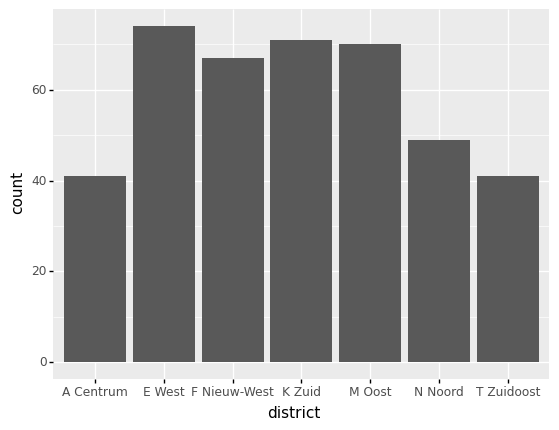

<ggplot: (120999351025)>

In [5]:
ggplot(data = ams, mapping = aes(x = 'district')) + \
    geom_bar()

It is worth noting the order in which we provide arguments to functions [`ggplot`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.ggplot.html) and [`aes`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.mapping.aes.html). In particular, the first argument to `ggplot` is a data frame, and the second is a mapping from variables to aesthetics, as specified by `aes`. Therefore, we can simplify the above code snippet by omitting the argument names into something like:

```python
ggplot(ams, aes(x = 'district')) + \
    geom_bar()
```

The arguments to `aes` are always the `x` and `y` axes first, optionally followed by other aesthetic mappings. Therefore, we can further simplify to the following:

```python
ggplot(ams, aes('district')) + \
    geom_bar()
```

We can rotate the plot with function [`coord_flip`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.coords.coord_flip.html), thus making the bars horizontal (it flips the `x` and `y` axes):

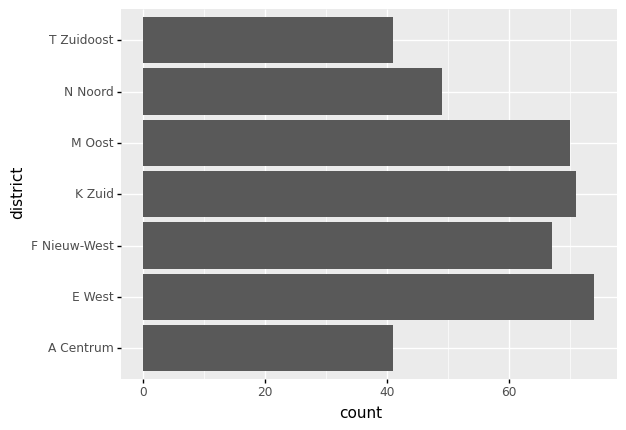

<ggplot: (120999539158)>

In [6]:
ggplot(ams, aes('district')) + \
    geom_bar() + \
    coord_flip()

### 3.2. Numeric

We can first compute several statistical summaries with Panda's function [`describe`](https://pandas.pydata.org/docs/reference/api/pandas.Series.describe.html):

In [7]:
ams['inc_income'].describe()

count       413.000000
mean      38174.818402
std       13507.381847
min       15700.000000
25%       30000.000000
50%       34200.000000
75%       43100.000000
max      140700.000000
Name: inc_income, dtype: float64

We can derive each statistic from this summary, or we can calculate it directly from the data using [the appropriate NumPy function](https://numpy.org/doc/stable/reference/routines.statistics.html):

In [8]:
print(ams['inc_income'].describe()['mean'])
print(ams['inc_income'].mean())
print(ams['inc_income'].quantile([.05, 0.95]))

38174.818401937046
38174.818401937046
0.05    25420.0
0.95    61040.0
Name: inc_income, dtype: float64


Keep in mind that each observation represents the mean income in a neighborhood, so for example `ams['inc_income'].std()` is the standard deviation of _mean incomes_; it is _not_ the standard deviation of individual citizen incomes within neighborhoods.

To create a histogram, we use [`geom_histogram`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_histogram.html) and, optionally, set a custom bin width:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 36'. Pick better value with 'binwidth'.


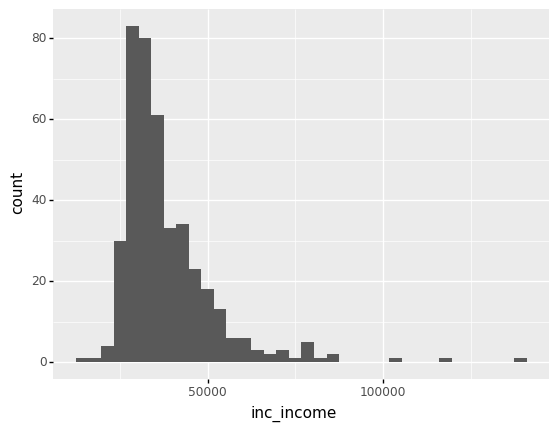

<ggplot: (120999461139)>

In [9]:
ggplot(ams, aes('inc_income')) + \
    geom_histogram()

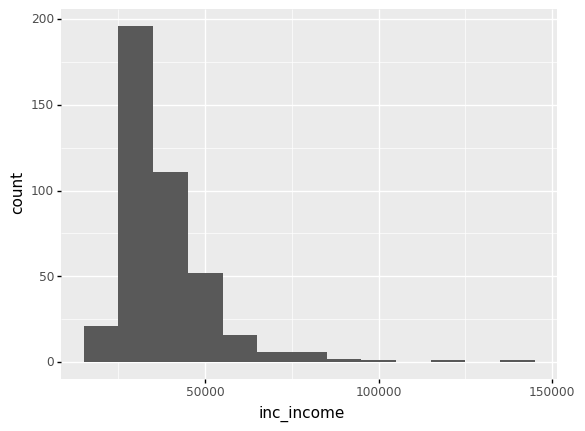

<ggplot: (120999495542)>

In [10]:
ggplot(ams, aes('inc_income')) + \
    geom_histogram(binwidth = 10000)

There seem to be some outliers with very high incomes. For simplicity, let’s ignore all observations where `inc_income` is larger than 80.000€.

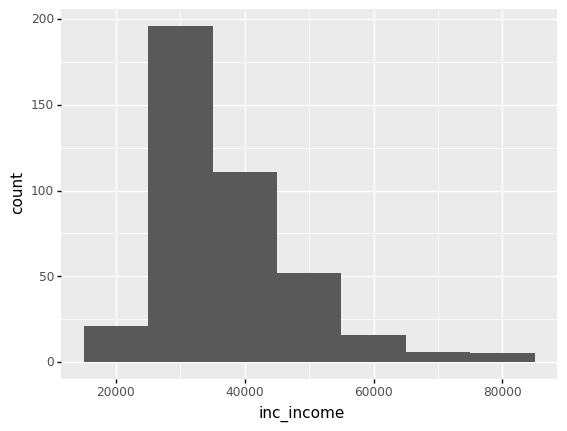

<ggplot: (120999575131)>

In [11]:
# Option 1: filter the data first with Pandas
tmp = ams.query('inc_income <= 80000')
ggplot(tmp, aes('inc_income')) + \
  geom_histogram(binwidth = 10000)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


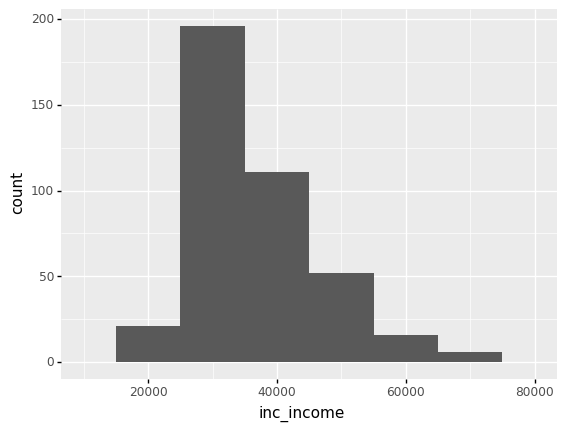

<ggplot: (120999457491)>

In [12]:
# Option 2: pass all data to ggplot, but set a limit according to the x axis values
# which effectively sets observations outside the limits to NA before plotting
ggplot(ams, aes('inc_income')) + \
  geom_histogram(binwidth = 10000) + \
  xlim(10000, 80000)

Note the warning given by `ggplot` in the second option, informing us that a number of rows have been removed from the plot because they fall outside the specified limits. Note also that both histograms are slightly different. Why is that?

We can alternatively indicate the number of bins instead of the bin width

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 2 rows containing missing values.


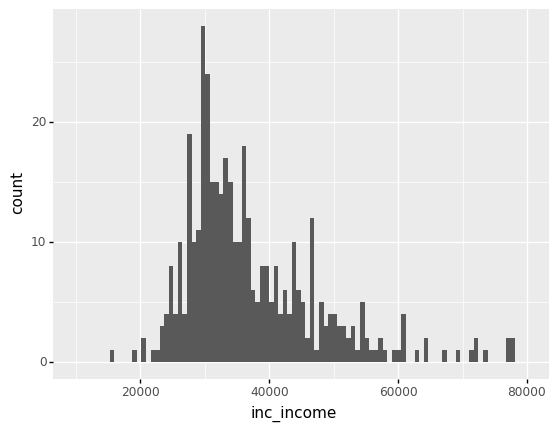

<ggplot: (120999704086)>

In [13]:
ggplot(ams, aes('inc_income')) + \
    geom_histogram(bins = 100) + \
    xlim(10000, 80000)

For density plots, we use [`geom_density`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_density.html) and, optionally, adjust the bandwidth:

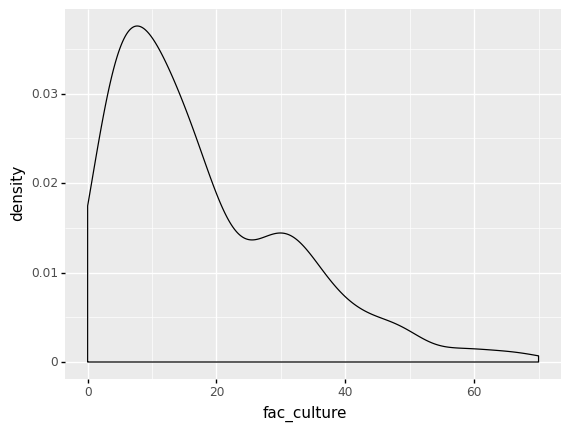

<ggplot: (120999750729)>

In [14]:
ggplot(ams, aes('fac_culture')) + \
    geom_density()

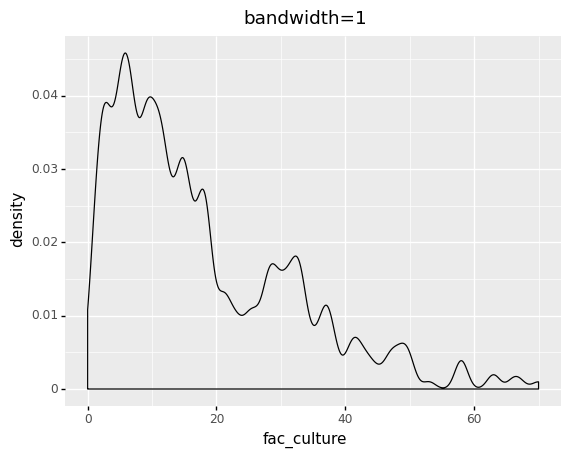

<ggplot: (120999862462)>

In [15]:
# Customize bandwidth
ggplot(ams, aes('fac_culture')) + \
    geom_density(bw = 1) + \
    labs(title = "bandwidth=1")

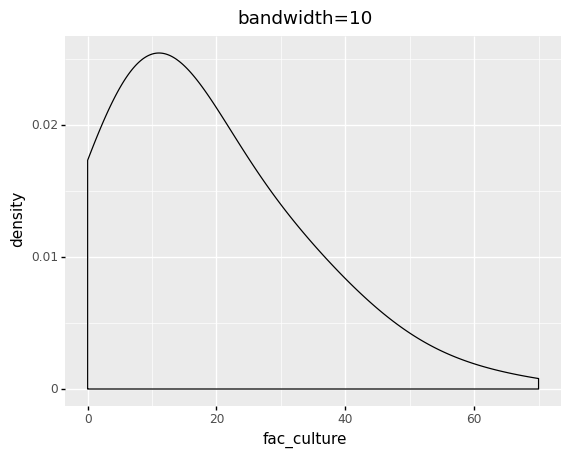

<ggplot: (120999566749)>

In [16]:
ggplot(ams, aes('fac_culture')) + \
    geom_density(bw = 10) + \
    labs(title = "bandwidth=10")

## 4. Two Variables
### 4.1. Categorical and Categorical

The first visualization can be a contingency table again. We can compute it with Panda's [`crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html):

In [17]:
pd.crosstab(ams['district'], ams['saf_catering'])

saf_catering,1.low,2.high
district,,
A Centrum,18,23
E West,8,66
F Nieuw-West,2,65
K Zuid,7,64
M Oost,5,65
N Noord,0,49
T Zuidoost,0,41


For conditional proportions, we need to specify the dimension over which we want to condition:

In [18]:
pd.crosstab(ams['district'], ams['saf_catering'], normalize = 'index') # over rows

saf_catering,1.low,2.high
district,,
A Centrum,0.439024,0.560976
E West,0.108108,0.891892
F Nieuw-West,0.029851,0.970149
K Zuid,0.098592,0.901408
M Oost,0.071429,0.928571
N Noord,0.000000,1.000000
T Zuidoost,0.000000,1.000000


In [19]:
pd.crosstab(ams['district'], ams['saf_catering'], normalize = 'columns') # over columns

saf_catering,1.low,2.high
district,,
A Centrum,0.450,0.061662
E West,0.200,0.176944
F Nieuw-West,0.050,0.174263
K Zuid,0.175,0.171582
M Oost,0.125,0.174263
N Noord,0.000,0.131367
T Zuidoost,0.000,0.109920


Barplots with two variables may be shown stacked (the default) or dodged:

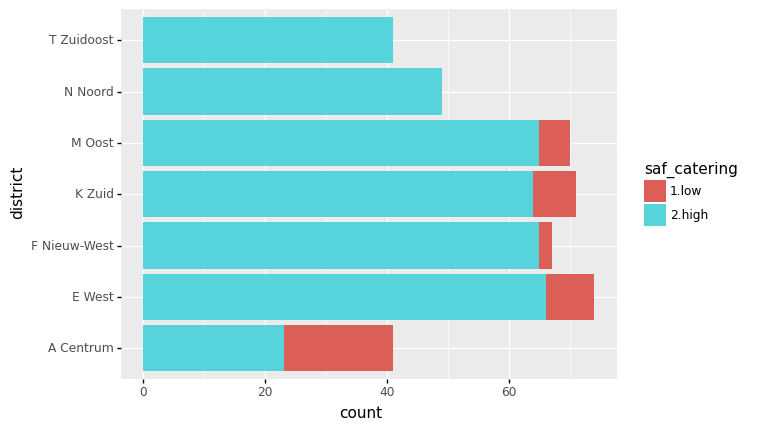

<ggplot: (120999835609)>

In [20]:
ggplot(ams, aes('district', fill = 'saf_catering')) + \
    geom_bar() + \
    coord_flip()

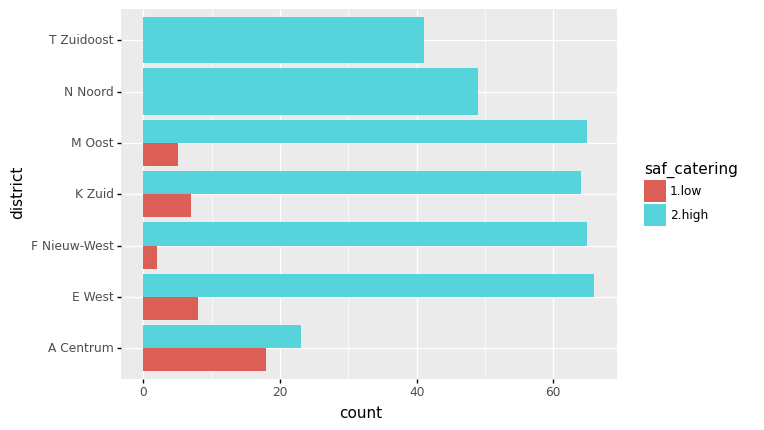

<ggplot: (120999862483)>

In [21]:
ggplot(ams, aes('district', fill = 'saf_catering')) + \
    geom_bar(position = 'dodge') + \
    coord_flip()

Note how we use aesthetic `fill` to specify that `saf_catering` should be used for color-coding. In our case, we want the bars to sum 100% for each district in order to get a better sense of proportions within district. We do this by setting `position = 'fill'`.

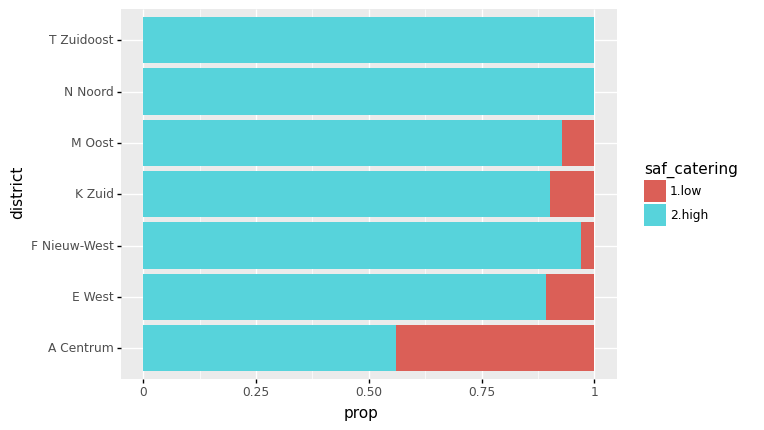

<ggplot: (121000083411)>

In [22]:
ggplot(ams, aes('district', fill = 'saf_catering')) + \
    geom_bar(position = 'fill') + \
    coord_flip() + \
    labs(y = 'prop')

Note also how we used [`labs`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.labels.labs.html) to manually set the label of the `x` axis (`y` before flipping), to reflect that this visualization refers to _proportions_ instead of _counts_.


### 4.2. Categorical and Numerical

To compare histograms of a numerical variable across the levels of a categorical variable, we can ask Plotnine to use a second aesthetic, namely the `fill` color, along with a bit of transparency (`alpha`) to better differentiate:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


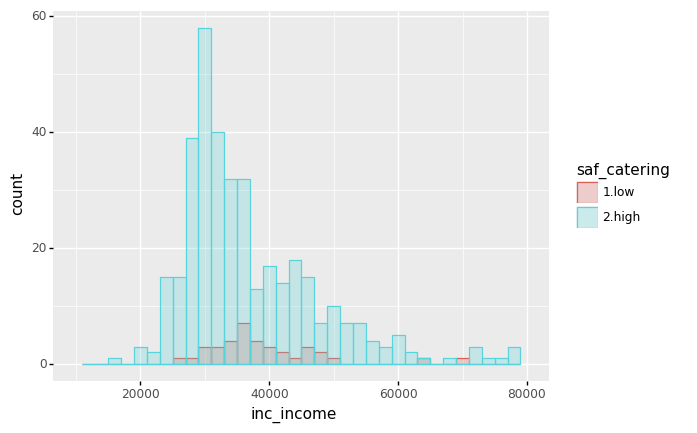

<ggplot: (121000087884)>

In [23]:
ggplot(ams, aes('inc_income', fill = 'saf_catering', color = 'saf_catering')) + \
    geom_histogram(binwidth = 2000, alpha = .25, position = 'identity') + \
    xlim(10000, 80000)

Note how we set `position = 'identity'` to avoid stacked bins as in a bar plot. Note also how we mapped `saf_catering` onto the `color` aesthetic as well; try without to see the difference.

This histogram does not help us much to compare the distributions of `inc_income` across `saf_catering` levels, and that is because there are many more observations of one level than the other. We can try plotting densities, or histograms and densities together. When doing so, we need to set aesthetic `y = after_stat('density')` in the histogram, to indicate that we want it to plot densities instead of counts:

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_bin : Removed 6 rows containing non-finite values.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_density : Removed 6 rows containing non-finite values.
C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.


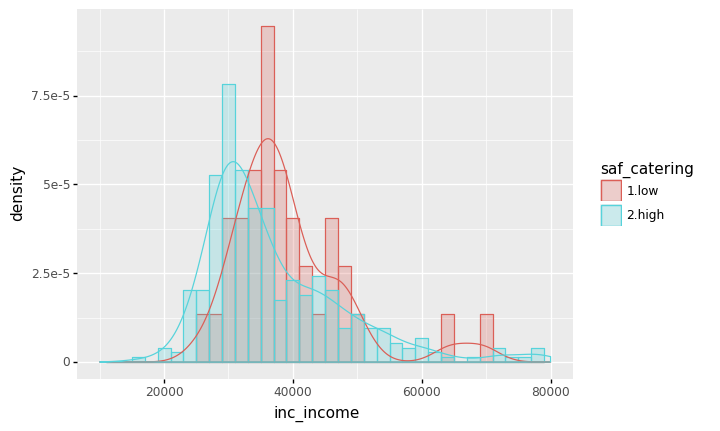

<ggplot: (120999870317)>

In [24]:
ggplot(ams, aes('inc_income', color = 'saf_catering')) + \
    geom_histogram(aes(y = after_stat('density'), fill = 'saf_catering'),
                   binwidth = 2000, alpha = .25, position = 'identity') + \
    geom_density(alpha = .25) + \
    xlim(10000, 80000)

As can be seen, we can indicate specific `aes`thetic mappings to each of the `geom_` functions to complement or modify the global mappings within the scope of a `geom_`. In our case, we set a `fill` color for the histogram bars, but not for the area under the densities. Of course, we could have plotted densities alone:

```python
ggplot(ams, aes('inc_income', color = 'saf_catering')) + \
    geom_density() + \
    xlim(10000, 80000)
```

For boxplots and violin plots we follow the same idea, but indicate the categorical variable through aesthetic `x` (note how we can also add a `fill`color as a visual aid):

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_boxplot : Removed 6 rows containing non-finite values.


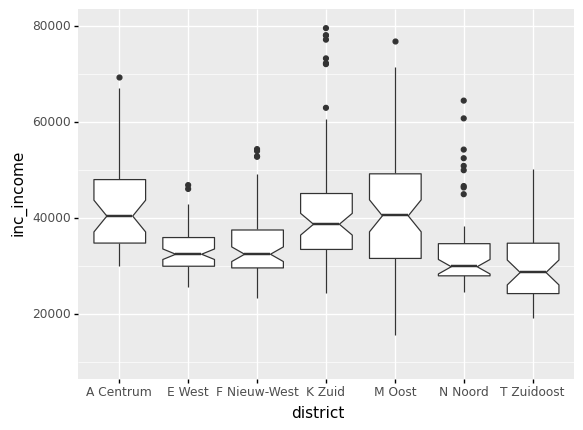

<ggplot: (120999500108)>

In [25]:
ggplot(ams, aes('district', 'inc_income')) + \
    geom_boxplot(notch = True) + \
    ylim(10000, 80000)

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_ydensity : Removed 6 rows containing non-finite values.


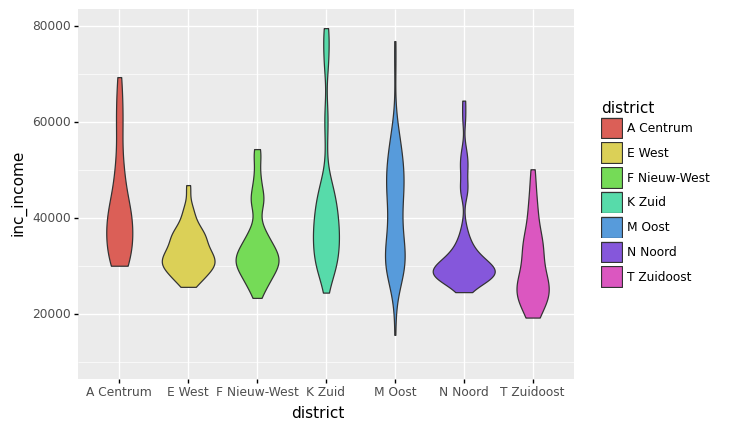

<ggplot: (121000300279)>

In [26]:
ggplot(ams, aes('district', 'inc_income', fill = 'district')) + \
    geom_violin() + \
    ylim(10000, 80000)

Note how Plotnine keeps warning us that a number of observations are ignored because of the use of `xlim`. For visualizations like boxplots this is important, because whether we ignore those observations or not can make a difference for instance in the interquartile range, thus affecting what is considered an outlier and what isn’t. In order to use _all_ data but limit the axes of a plot, we can use [`coord_cartesian`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.coords.coord_cartesian.html#plotnine.coords.coord_cartesian) instead. Compare the boxplot above with the one below, specially for districts A and K:

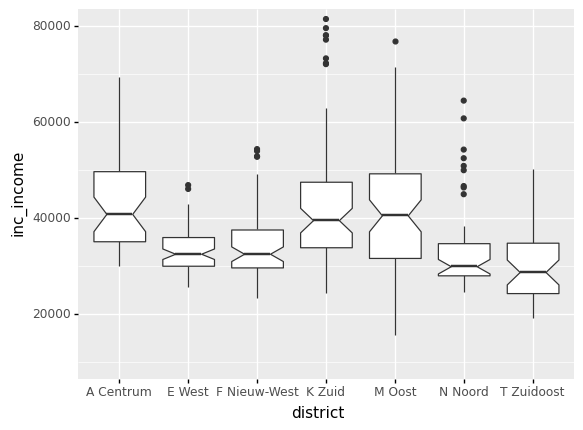

<ggplot: (121000300135)>

In [27]:
ggplot(ams, aes('district', 'inc_income')) + \
    geom_boxplot(notch = True) + \
    coord_cartesian(ylim = [10000, 80000])

If we want to reorder the levels of the categorical variable, we can use Pandas to calculate the order we want, and pass it to function [`scale_x_discrete`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_x_discrete.html) to reorder the elements along the `x` axis, as this is the one mapping our categorical variable. For instance, let’s sort districts by mean `inc_gini` value:

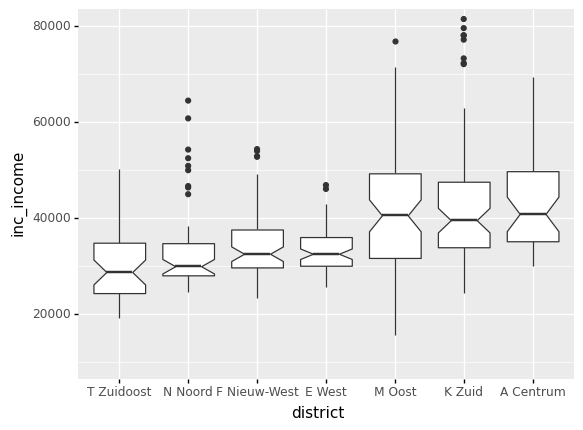

<ggplot: (120993790751)>

In [28]:
ggplot(ams, aes('district', 'inc_income')) + \
    geom_boxplot(notch = True) + \
    coord_cartesian(ylim = [10000, 80000]) + \
    scale_x_discrete(limits = ams.groupby('district') \
                         .aggregate(m = ('inc_gini', 'mean')) \
                         .sort_values('m').index.tolist() )

### 4.3. Numerical and Numerical

If we want to compute correlation coefficients, we use Panda's [`corr`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) and specify which coefficient in particular through argument `method`:

In [29]:
print('Pearson:', ams['inc_income'].corr(ams['hou_value']))
print('Spearman:', ams['inc_income'].corr(ams['hou_value'], method = 'spearman'))

Pearson: 0.8947406412705242
Spearman: 0.8382518277205194


We can also use `corr` to compute all correlations between every pair of variables in a data frame:

In [30]:
ams.loc[:, 'hou_corporation':'hou_value'].corr()

,hou_corporation,hou_occupant,hou_other,hou_value
hou_corporation,1.000000,-0.067182,-0.241820,-0.511416
hou_occupant,-0.067182,1.000000,0.438736,0.201106
hou_other,-0.241820,0.438736,1.000000,0.258751
hou_value,-0.511416,0.201106,0.258751,1.000000


As an exercise, try to automatically compute correlations between all numerical variables in a data frame; check method [`select_dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html).

A scatterplot is created by using [`geom_point`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_point.html) to draw observations:

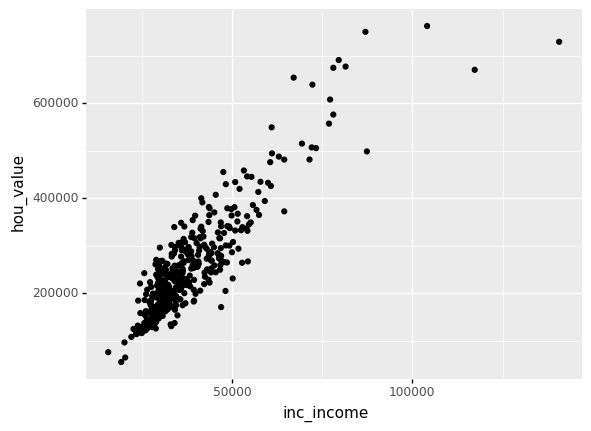

<ggplot: (121002000210)>

In [31]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
    geom_point()

When there are too many observations to plot, we can use some transparency or use alternative plots:

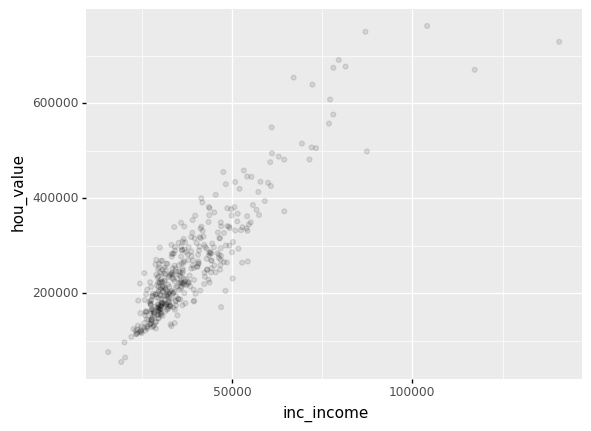

<ggplot: (121001950552)>

In [32]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
  geom_point(alpha = .1)

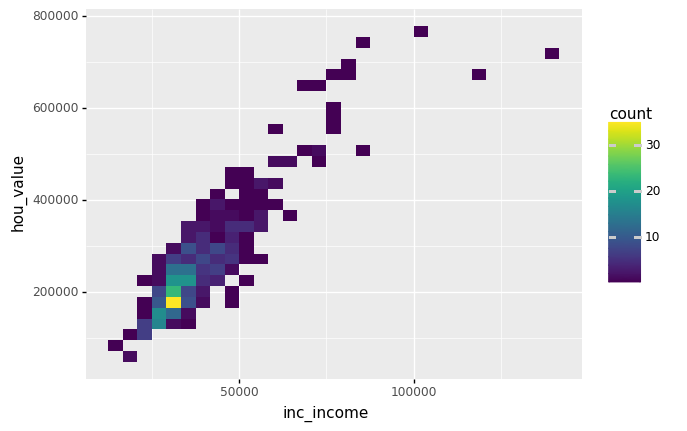

<ggplot: (121001981329)>

In [33]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
  geom_bin2d()

Contour plots and 2D densities are created with function [`stat_density_2d`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.stats.stat_density_2d.html).

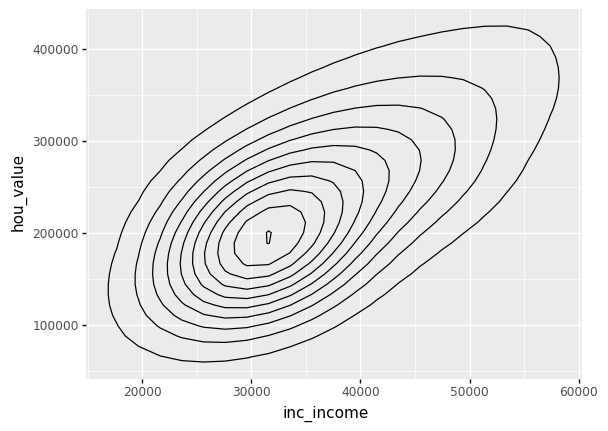

<ggplot: (121002462519)>

In [34]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
  geom_density_2d(levels = 10) # draw 10 contours

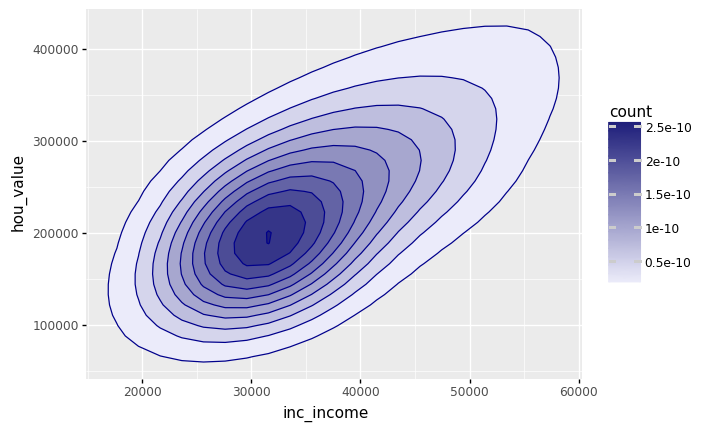

<ggplot: (121002471259)>

In [35]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
    stat_density_2d(aes(fill = after_stat('level')), geom = 'polygon', \
                    color = 'darkblue', levels = 10) + \
    scale_fill_gradient(low = '#ebebfa', high = '#1f1f7a', name = 'count')

Note how we specified custom `fill` colors in the HTML format `#rrggbb`. In general, we can use custom scales for many aesthetics. Check [all `scale_color_` and `scale_fill_` functions](https://plotnine.readthedocs.io/en/stable/api.html#color-and-fill-scales) in Plotnine. You can choose your colors with a tool like https://www.w3schools.com/colors/colors_picker.asp, or use one of the predefined [color brewer](https://colorbrewer2.org) scales (see [`scale_fill_brewer`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.scales.scale_fill_brewer.html) for more information on _sequential_, _diverging_ and _qualitative_ scales).

## 5. Additional Variables

To facet a plot through the levels of a categorical variable, we can use [`facet_wrap`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_wrap.html):

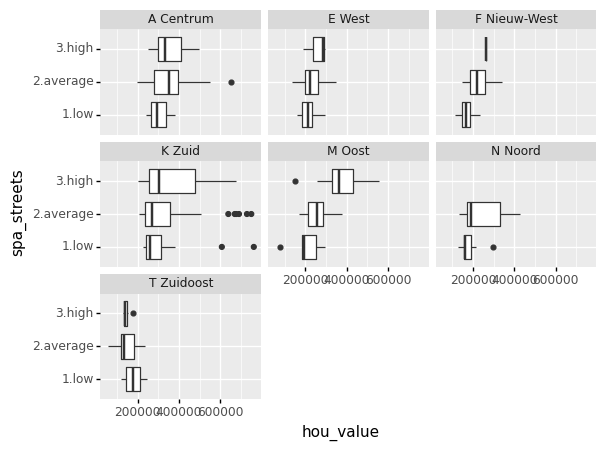

<ggplot: (121002521510)>

In [36]:
ggplot(ams, aes('spa_streets', 'hou_value')) + \
    geom_boxplot() + \
    coord_flip() + \
    facet_wrap('district')

In order to facet over multiple variables in a grid fashion, we can use [`facet_grid`](https://plotnine.readthedocs.io/en/stable/generated/plotnine.facets.facet_grid.html) instead:

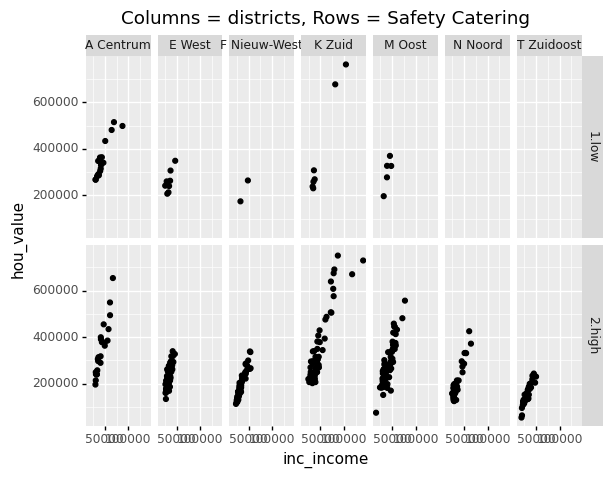

<ggplot: (120999799821)>

In [37]:
ggplot(ams, aes('inc_income', 'hou_value')) + \
    geom_point() + \
    facet_grid('saf_catering ~ district') + \
    labs(title = 'Columns = districts, Rows = Safety Catering')

Other variables may be used by setting the proper aesthetic, such as `color`, `shape` or `size`:

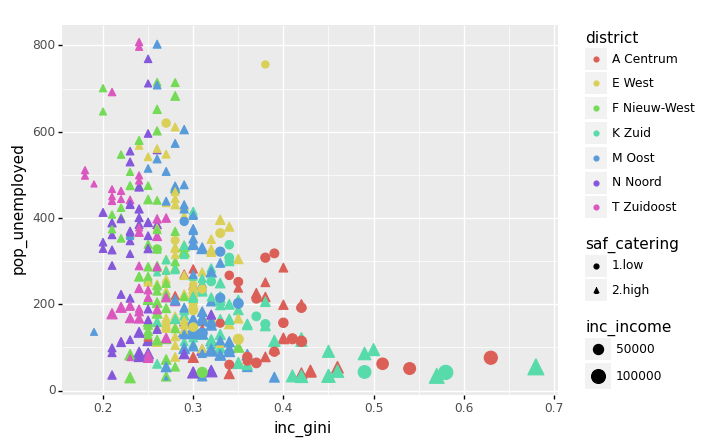

<ggplot: (121000004907)>

In [38]:
ggplot(ams, aes('inc_gini', 'pop_unemployed', \
                color = 'district', shape ='saf_catering', size = 'inc_income')) + \
    geom_point()

## 6. Transformations

We have two options to apply transformations: transform the data and plot it, or plot the raw data but transform the scales. The main difference is in how intuitive the interpretation will be when looking at transformed scores on a linear scale vs. raw scores on a transformed scale.

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


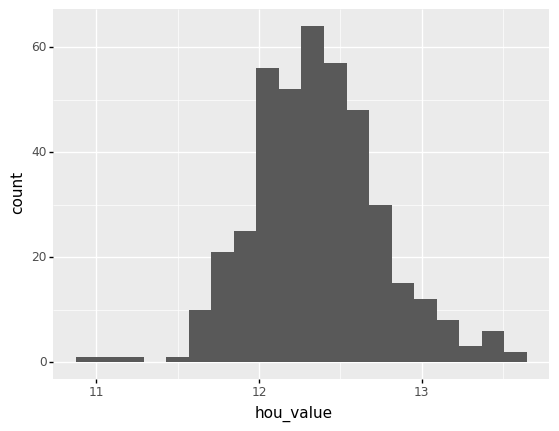

<ggplot: (120999965516)>

In [39]:
# Option 1: transform with NumPy and plot
ggplot(ams, aes(np.log(ams['hou_value']))) + \
    geom_histogram()

C:\ProgramData\Anaconda3\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 20'. Pick better value with 'binwidth'.


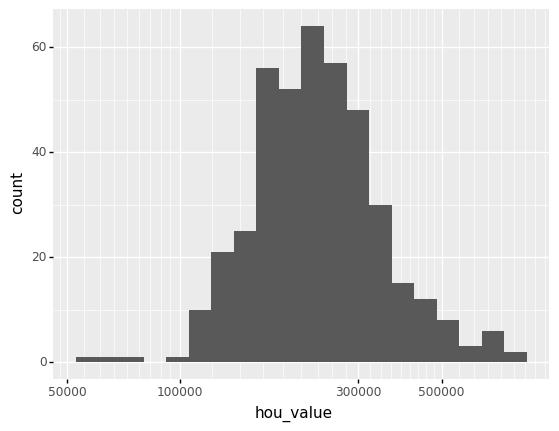

<ggplot: (121002472647)>

In [40]:
# Option 2: plot the raw data on a transformed scale
ggplot(ams, aes('hou_value')) + \
    geom_histogram() + \
    scale_x_log10()

Check the documentation for [all the `scale_xxx_continuous` functions](https://plotnine.readthedocs.io/en/stable/api.html#scales) applicable to various aesthetics, as well as using a custom `trans` argument for [arbitrary transformations](https://mizani.readthedocs.io/en/latest/transforms.html).

We can of course transform each axis separately, or both at the same time. Compare the following plots in terms of the linearity of the relationship:

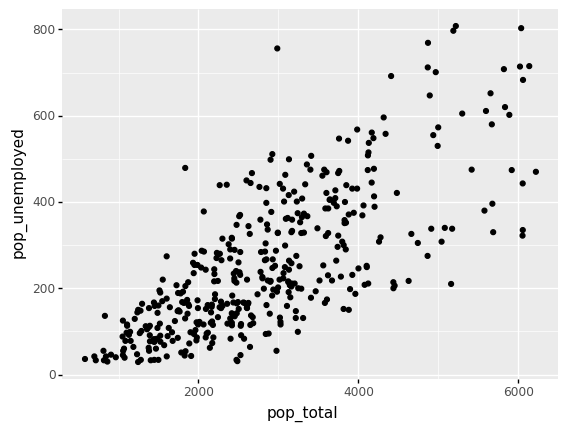

<ggplot: (121002425588)>

In [41]:
ggplot(ams, aes('pop_total', 'pop_unemployed')) + \
    geom_point()

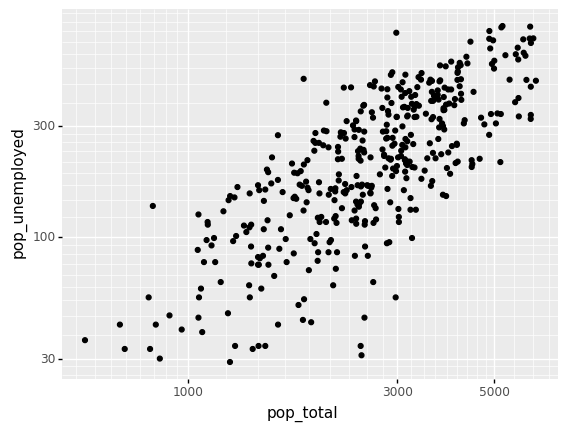

<ggplot: (121001791525)>

In [42]:
ggplot(ams, aes('pop_total', 'pop_unemployed')) + \
    geom_point() + \
    scale_x_log10() + \
    scale_y_log10()

Finally, keep in mind that transformations may be applied to other aesthetics, such as `color`. Compare the following two plots:

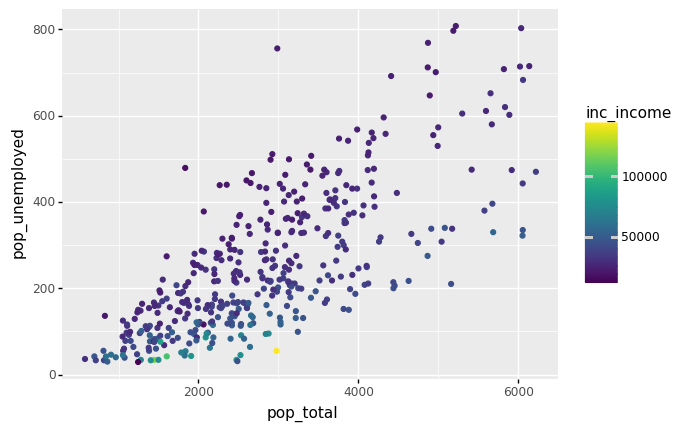

<ggplot: (121000308110)>

In [43]:
ggplot(ams, aes('pop_total', 'pop_unemployed', color = 'inc_income')) + \
    geom_point()

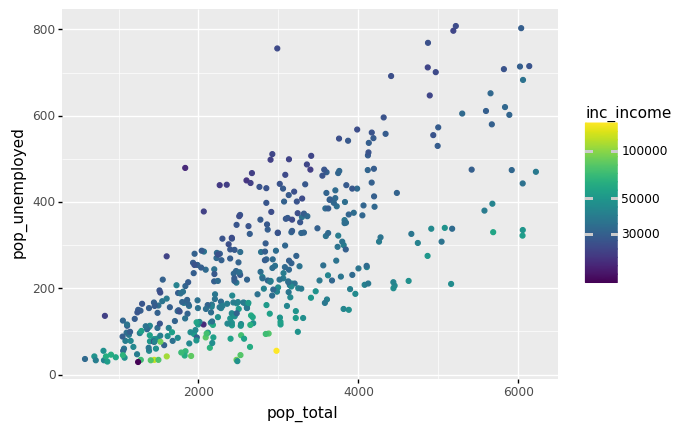

<ggplot: (120999513399)>

In [44]:
ggplot(ams, aes('pop_total', 'pop_unemployed', color = 'inc_income')) + \
    geom_point() + \
    scale_color_continuous(trans = 'log10')